In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
model = torch.load("D:\Test_task\experiment\weights_bnd_432.pt")
model.eval()

), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (3): Bottleneck(
        (conv1): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (layer3): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

<AxesSubplot:xlabel='epoch'>

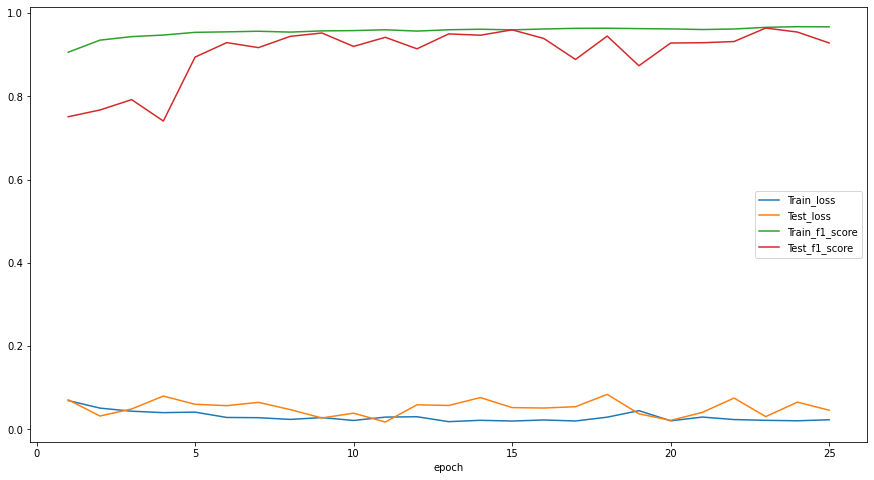

In [3]:
df = pd.read_csv("D:\Test_task\experiment\log.csv")
df.plot(x='epoch',figsize=(15,8))

In [4]:
# Read  a sample image and mask from the data-set
img = cv2.imread(f'D:\Test_task\data\Images\img_3.jpg').transpose(2,0,1).reshape(1,3,64,64)
mask = cv2.imread(f'D:\Test_task\data\Masks\img_3.jpg')
print(img.shape)
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(1, 3, 64, 64)


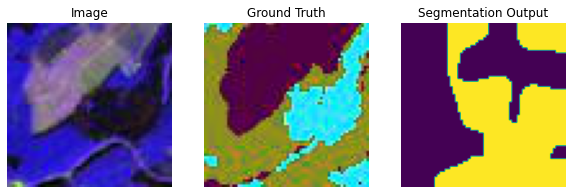

In [62]:
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.3);
# plt.imshow(a['out'].cpu().detach().numpy()[0][0])
plt.title('Segmentation Output')
plt.axis('off');
plt.savefig('./experiment/SegmentationOutput_Bands_432.png',bbox_inches='tight')

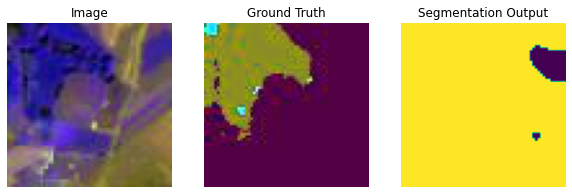